### The final is a small project based on a real world dataset. The dataset is a log of geophysical measurements. The goal of this project is to predict p-wave velocity (Vp) based on other geophysical measurements in the well log. 

### Your submission will be include this notebook and a brief report of your results. Your notebook should be organized according to four tasks described below. In addition, please submit a brief report (about a paragraph per task) discussing the choices you made in each section and which factors motivated your decision.

#### Dataset description

Features
--------
Depth:
GR: **Gamma ray**. Shales and clays are derived from rocks that tend to contain naturally occurring radioactive elements, primarily potassium, uranium and thorium. So, they tend to emit more gamma rays.

NPHI: **Neutron porosity** In the field of formation evaluation, porosity is one of the key measurements to quantify oil and gas reserves. Neutron porosity measurement employs a neutron source to measure the hydrogen index in a reservoir, which is directly related to porosity. The Hydrogen Index (HI) of a material is defined as the ratio of the concentration of hydrogen atoms per cm3 in the material, to that of pure water at 75 °F. As hydrogen atoms are present in both water and oil-filled reservoirs, measurement of the amount allows estimation of the amount of liquid-filled porosity.

RHO: **Density**

SW: **Water Saturation** The fraction of water in a given pore space. It is expressed in volume/volume, percent or saturation units. Unless otherwise stated, water saturation is the fraction of formation water in the undisturbed zone. Usually derived from an empirical law (Archie's Law)


VSH: **Volume of Shale** Estimate of the shale fraction based on the Gamma ray plot. 

PHI: **Porosity**

Target
------
Vp: p-wave velocity

### Your tasks

1) Clean the data. We will exclude some features from our data (provided for you below). The data contains Nans which should be removed and the Vp log has an outlier which should be identified and removed.
2) Feature selection. Several features should be removed in the first section (done for you). From there, you are free to choose features as you see fit.
3) Train/test/validation split. The regression target is a 'time series'. Based on your experience in predicting time series from previous lab and homework exercises, choose a sensible split of the training and test data. You may also consider employing a cross validation strategy.
4) Modelling. This is a regression problem. Use simple oridinary least squaress as a benchmark and try to improve results e.g. with regularization (lasso, ridge, etc). Please explore other regression algorithms available in sci-kit learn as well.
5) Model selection and tuning. Once you have established a suitable benchmark in part 4, tune the hyperparameters of your model to try and improve your results. 
6) Prepare the brief report described above. This can be included in a markdown cell in the notebook or submitted in a seperate document.






# Task 1

In [12]:
# Import main libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns

In [13]:
#Read the data
logs = pd.read_csv('qsiwell2_predict.csv')

#Columns to drop
col_names = ['VS','RHO_OLD','SWX','VPVS','RHOm','RHOf','IP', 'IS', 'ZONE_NUM'] #It is cheating to use VPVS as a feature if you have VS.
logs.drop(col_names, axis=1, inplace=True)

#First row has some empty cells so remove them
logs=logs.iloc[1:,:] 

# Task 2
Feature selection. Several features should be removed in the first section (done for you). From there, you are free to choose features as you see fit.

In [14]:
# Check number of NaNs
logs_test = logs
# print(logs_test.isnull().sum())
# print(logs_test[-1415:])

# Remove row with VP outlier
logs_test = logs_test.drop(logs_test.index[-1])
logs_test.count

# New logs dataframe with removed DEPTH, RHO, SW, and PHI columns
# Depth feature was removed because it is a linear feature which behaves like an x-axis
logs1 = logs_test.drop(columns=['DEPTH', 'RHO', 'SW', 'PHI'])
# print('logs1: ', logs1)
predictors = ['GR', 'NPHI', 'VSH']

# New logs dataframe with last NaN-containing rows removed
logs2 = logs_test.drop(logs_test.index[-1414:])
# print('logs2: ', logs2)

# Task 3 

Train/test/validation split. The regression target is a 'time series'. Based on your experience in predicting time series from previous lab and homework exercises, choose a sensible split of the training and test data. You may also consider employing a cross validation strategy. 

In [15]:
# Normalize predictors
logs1[predictors] = logs1[predictors]/logs1[predictors].max()
# print(logs1.describe())

# Train/test split
from sklearn.model_selection import train_test_split

x = logs1[predictors]
y = logs1['VP']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42) # Test using logs1 method 

# Task 4
Modelling. This is a regression problem. Use simple oridinary least squares as a benchmark and try to improve results e.g. with regularization (lasso, ridge, etc). Please explore other regression algorithms available in sci-kit learn as well.

### Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score

lr = LinearRegression(fit_intercept=True)
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

# Predicted p-wave velocity values
# print("Predicted p-wave velocity values: ", y_pred)

# Mean squared error
mse_lr = mean_squared_error(y_test, y_pred_lr)
print("Mean squared error: ", mse_lr)

# Model intercept
print("Intercept: ", lr.intercept_)

# Feature coefficients
print("Coefficients:")
list(zip(x, lr.coef_))

Mean squared error:  38365.00137028259
Intercept:  3716.420902450959
Coefficients:


[('GR', 1798.0839039367963),
 ('NPHI', -2164.286122639207),
 ('VSH', -1387.4529378378336)]

### Lasso Regression

In [17]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=0.1)
lasso.fit(x_train, y_train)
y_pred_lasso = lasso.predict(x_test)

print("Intercept: ", lasso.intercept_)

print("Coefficients:")
list(zip(x, lasso.coef_))

Intercept:  4353.60700924293
Coefficients:


[('GR', -0.0), ('NPHI', -2165.6512295555954), ('VSH', -223.2566461058006)]

### Ridge Regression

In [18]:
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.1)
ridge.fit(x_train, y_train)
y_pred_ridge = ridge.predict(x_test)

mse_ridge = mean_squared_error(y_test, y_pred_ridge)
print("Mean squared error: ", mse_ridge)

print("Intercept: ", ridge.intercept_)

print("Coefficients:")
list(zip(x, ridge.coef_))

Mean squared error:  38308.99928958648
Intercept:  4341.02422906201
Coefficients:


[('GR', 35.33733324523564),
 ('NPHI', -2163.233516546798),
 ('VSH', -251.1586977942193)]

### Elastic Net Regression

In [19]:
from sklearn.linear_model import ElasticNet

e_net = ElasticNet(alpha=0.1)
e_net.fit(x_train, y_train)
y_pred_e_net = e_net.predict(x_test)

mse_e_net = mean_squared_error(y_test, y_pred_e_net)
print("Mean squared error: ", mse_e_net)

print("Intercept: ", e_net.intercept_)

print("Coefficients:")
list(zip(x, e_net.coef_))

Mean squared error:  91205.12953146863
Intercept:  3649.224831856065
Coefficients:


[('GR', -252.04543956719843),
 ('NPHI', -703.9325322319046),
 ('VSH', -392.7630215161484)]

### Decision Tree Regression

In [20]:
from sklearn.ensemble._forest import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=4)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

mse_dt = mean_squared_error(y_test, y_pred_dt)
print("Mean squared error: ", mse_dt)

Mean squared error:  35853.58383243138


### Results

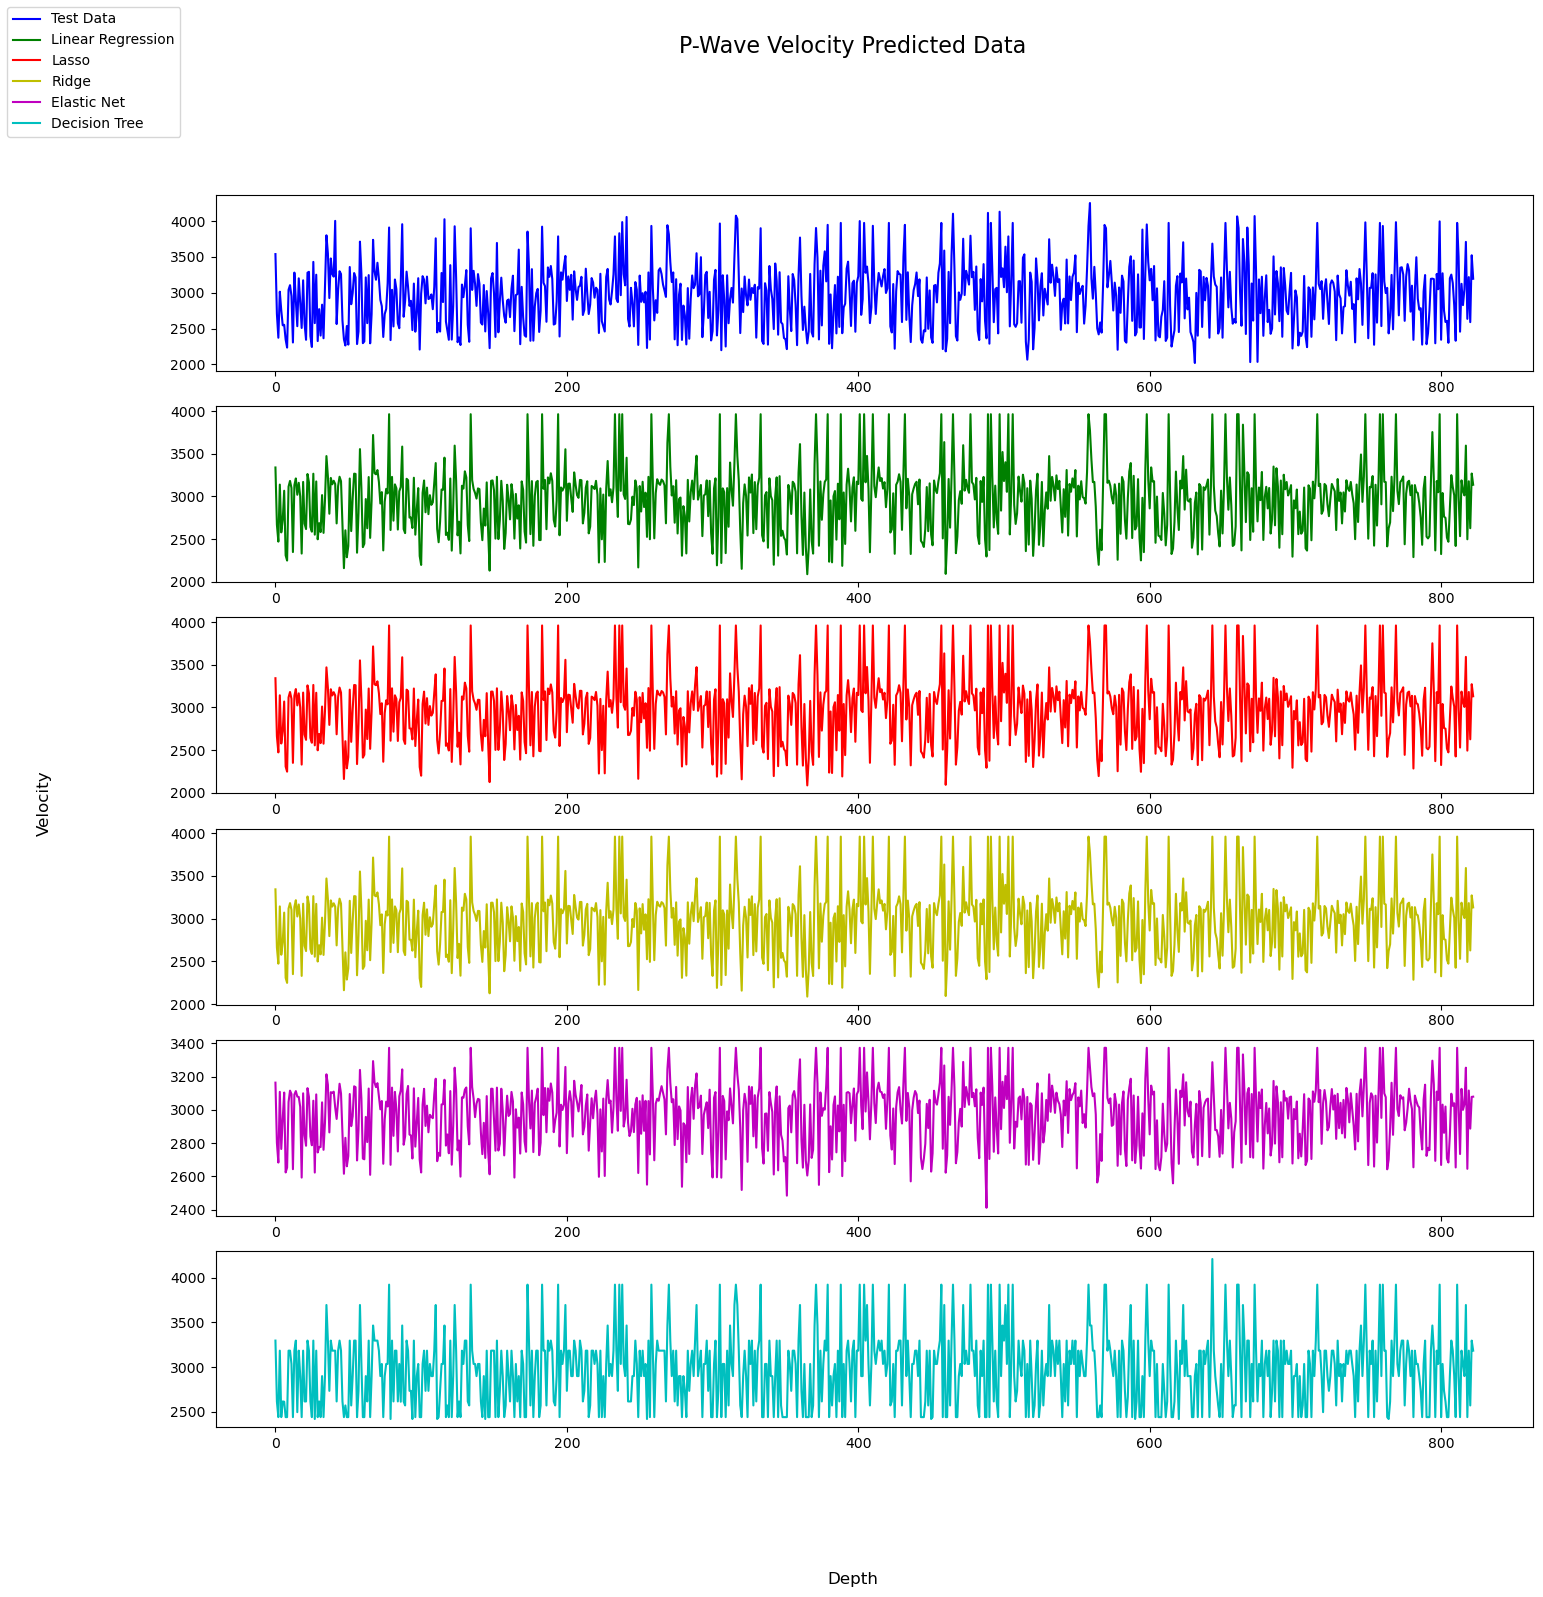

In [21]:
plt.rcParams["figure.figsize"] = (17,16)
fig, ax = plt.subplots(nrows=6, ncols=1)
x_plot = np.arange(len(x_test))

ax[0].plot(x_plot, y_test, label='Test Data', color='b')
ax[1].plot(x_plot, y_pred_lr, label='Linear Regression', color='g')
ax[2].plot(x_plot, y_pred_lasso[0:len(x_test)], label="Lasso", color='r')
ax[3].plot(x_plot, y_pred_ridge, label="Ridge", color='y')
ax[4].plot(x_plot, y_pred_e_net, label="Elastic Net", color='m')
ax[5].plot(x_plot, y_pred_dt, label="Decision Tree", color='c')

fig.suptitle('P-Wave Velocity Predicted Data', fontsize=16)
fig.supxlabel('Depth')
fig.supylabel('Velocity')
fig.legend(loc="upper left")
plt.show()

### Cross-validation

In [22]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LassoCV
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import ElasticNetCV

# Linear Regression
scores = pd.DataFrame()
scores['scores_lr'] = cross_val_score(lr, x_train, y_train, scoring='neg_mean_absolute_error', cv=5, n_jobs=-1)
scores = scores.abs()

# Lasso evaluation
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(x_train, y_train)
lasso_cv.score(x_test, y_test)

# Ridge evaluation
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(x_train, y_train)
ridge_cv.score(x_test, y_test)

# Elastic Net evaluation
e_net_cv = ElasticNetCV(cv=5)
e_net_cv.fit(x_train, y_train)
e_net_cv.score(x_test, y_test)

# Decision Tree evaluation
dt_scores = cross_val_score(dt, x_train, y_train, cv=5)

# Not sure about this value
print("Linear Regression Score: ", scores['scores_lr'].mean())

print("Lasso Score: ", lasso_cv.score(x_test, y_test))
print("Ridge Score: ", ridge_cv.score(x_test, y_test))
print("Elastic Net Score: ", e_net_cv.score(x_test, y_test))
print("Mean Decision Tree Score", np.mean(dt_scores))

Linear Regression Score:  156.88407644577228
Lasso Score:  0.8153238193499385
Ridge Score:  0.8153371875380373
Elastic Net Score:  0.5042159676703293
Mean Decision Tree Score 0.7898158731313096


# Task 5
Model selection and tuning. Once you have established a suitable benchmark in part 4, tune the hyperparameters of your model to try and improve your results.

### Model Choice: Ridge Regression

In [23]:
# Tune alpha parameter to find best value
ridge_cv1 = RidgeCV(alphas=[1e-20, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20, 100])
model_cv1 = ridge_cv1.fit(x_train, y_train)
print("Best alpha value: ", model_cv1.alpha_)
print("Old CV score: ", ridge_cv.score(x_test, y_test))
print("New CV score: ", ridge_cv1.score(x_test, y_test))

Best alpha value:  0.01
Old CV score:  0.8153371875380373
New CV score:  0.8152597409435344


In [24]:
#Ideal Ridge regression
ridge1 = Ridge(alpha=model_cv1.alpha_)
ridge1.fit(x_train, y_train)
y_pred_ridge1 = ridge1.predict(x_test)

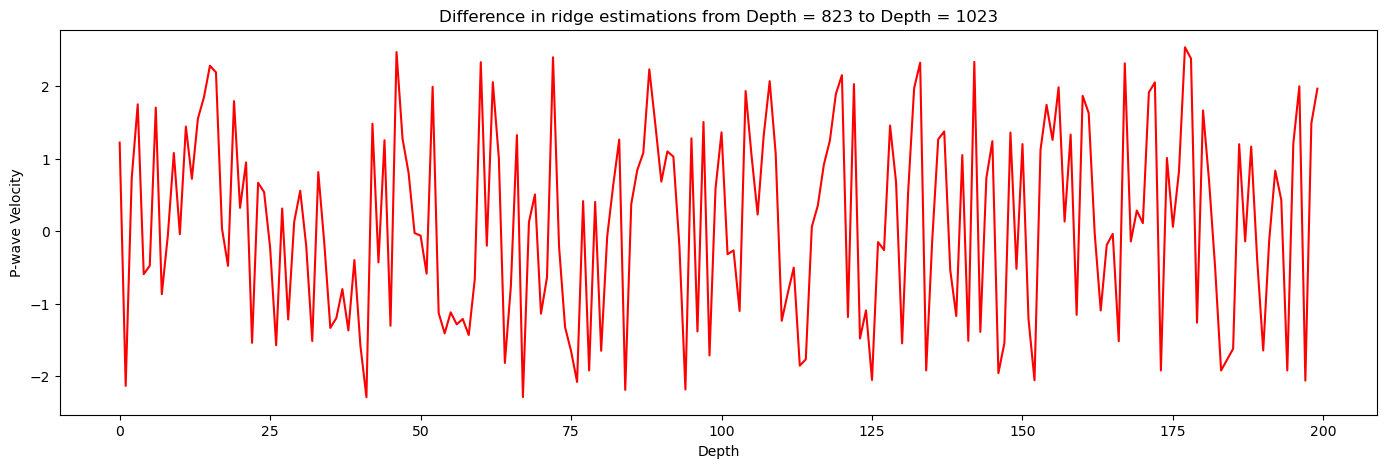

In [25]:
# Plot comparison with original
plt.rcParams["figure.figsize"] = (17,5)

difference = y_pred_ridge - y_pred_ridge1
plt.plot(x_plot[0:200], difference[0:200], color='r')
plt.title("Difference in ridge estimations from Depth = 823 to Depth = 1023")
plt.xlabel('Depth')
plt.ylabel('P-wave Velocity')
plt.show()

# Task 6

https://docs.google.com/document/d/1YmT1lQ4TjQPILFhvoUy71YSFF-4L_1jvPOzwKqBRrKs/edit?usp=sharing